In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

### Leitura do arquivo csv

In [2]:
base_credit = pd.read_csv('../credit_risk_dataset.csv', sep=',')

### Primeiras cinco células e cinco últimas

In [3]:
base_credit.head(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
base_credit.tail(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


### Dados a serem análisados
As colunas que representam a idade, salário mensal, a posse de casa, o motivo do emprestimo, a quantidade de emprestimo e o status do emprestimo da pessoa.

In [5]:
df_credit = base_credit[['person_age', 'person_income', 'person_home_ownership', 'loan_intent', 'loan_amnt', 'loan_status']]
df_credit

,person_age,person_income,person_home_ownership,loan_intent,loan_amnt,loan_status
0,22,59000,RENT,PERSONAL,35000,1
1,21,9600,OWN,EDUCATION,1000,0
2,25,9600,MORTGAGE,MEDICAL,5500,1
3,23,65500,RENT,MEDICAL,35000,1
4,24,54400,RENT,MEDICAL,35000,1
...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,PERSONAL,5800,0
32577,54,120000,MORTGAGE,PERSONAL,17625,0
32578,65,76000,RENT,HOMEIMPROVEMENT,35000,1
32579,56,150000,MORTGAGE,PERSONAL,15000,0


### Visualização dos dados

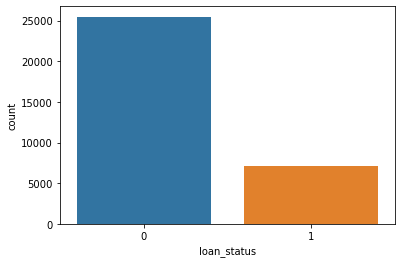

In [6]:
sns.countplot(x = df_credit['loan_status']);

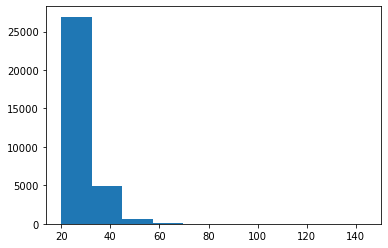

In [7]:
plt.hist(x = df_credit['person_age']);

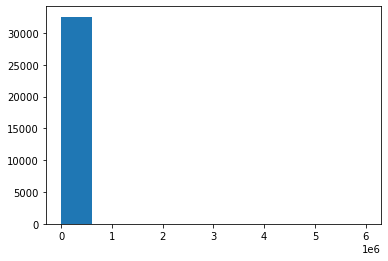

In [8]:
plt.hist(x = df_credit['person_income']);

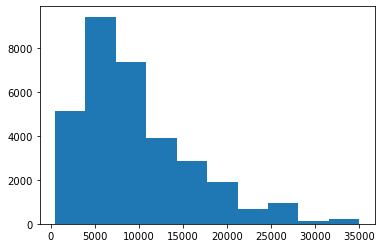

In [9]:
plt.hist(x = df_credit['loan_amnt']);

### Pré-processamento

In [10]:
df_credit.describe()

,person_age,person_income,loan_amnt,loan_status
count,32581.000000,3.258100e+04,32581.000000,32581.000000
mean,27.734600,6.607485e+04,9589.371106,0.218164
std,6.348078,6.198312e+04,6322.086646,0.413006
min,20.000000,4.000000e+03,500.000000,0.000000
25%,23.000000,3.850000e+04,5000.000000,0.000000
50%,26.000000,5.500000e+04,8000.000000,0.000000
75%,30.000000,7.920000e+04,12200.000000,0.000000
max,144.000000,6.000000e+06,35000.000000,1.000000


### Tratamento de valores inconsistentes:

Iremos considerar que pessoas acima de 100 anos são erros no banco de dados, e a opção para tratamento foi o de remoção
das linhas

In [11]:
df_credit.loc[df_credit["person_age"] > 100]

,person_age,person_income,person_home_ownership,loan_intent,loan_amnt,loan_status
81,144,250000,RENT,VENTURE,4800,0
183,144,200000,MORTGAGE,EDUCATION,6000,0
575,123,80004,RENT,EDUCATION,20400,0
747,123,78000,RENT,VENTURE,20000,0
32297,144,6000000,MORTGAGE,PERSONAL,5000,0


In [12]:
df_credit = df_credit.drop(df_credit[df_credit["person_age"] > 100].index)
df_credit

,person_age,person_income,person_home_ownership,loan_intent,loan_amnt,loan_status
0,22,59000,RENT,PERSONAL,35000,1
1,21,9600,OWN,EDUCATION,1000,0
2,25,9600,MORTGAGE,MEDICAL,5500,1
3,23,65500,RENT,MEDICAL,35000,1
4,24,54400,RENT,MEDICAL,35000,1
...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,PERSONAL,5800,0
32577,54,120000,MORTGAGE,PERSONAL,17625,0
32578,65,76000,RENT,HOMEIMPROVEMENT,35000,1
32579,56,150000,MORTGAGE,PERSONAL,15000,0


### Valores faltantes: 

Este dataframe não veio com valores nulos, por isso não é necessário tratar

In [13]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32576 entries, 0 to 32580
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   person_age             32576 non-null  int64 
 1   person_income          32576 non-null  int64 
 2   person_home_ownership  32576 non-null  object
 3   loan_intent            32576 non-null  object
 4   loan_amnt              32576 non-null  int64 
 5   loan_status            32576 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 1.7+ MB


In [14]:
df_credit.isnull().sum()

person_age               0
person_income            0
person_home_ownership    0
loan_intent              0
loan_amnt                0
loan_status              0
dtype: int64

### Divisão dos valores dos previsores e da classe

In [15]:
previsores = df_credit.iloc[:, 0:4].values
classe = df_credit.iloc[:,4].values

### Conversão das variáveis categóricas em numérica

In [20]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

onehot_enconder = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [2, 3])], remainder='passthrough')
previsores = onehot_enconder.fit_transform(previsores)

### Padronização dos valores

Algumas colunas possuem valores pequenos em relação as outras colunas, por isso temos que tratar por padronizar os valores

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)

### Separação das bases de treino e de teste

In [24]:
from sklearn.model_selection import train_test_split

previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.25, random_state=0)

### Salvar as variáveis que foram realizados os pré processos

In [25]:
import pickle

In [26]:
with open('credit.pkl', mode = 'wb') as f:
  pickle.dump([previsores_treinamento, classe_treinamento, previsores_teste, classe_teste], f)